<a href="https://colab.research.google.com/github/rishika-saha/Computer_Vision/blob/main/FMNIST_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Sep  1 05:00:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Importing Libraries**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

**Importing Dataset**

In [ ]:
from keras.datasets import fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


**Preprocessing Dataset**

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train=x_train.reshape(60000, 28, 28, 1)
x_test=x_test.reshape(10000, 28, 28, 1)

In [ ]:
train_datagen=ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set=train_datagen.flow(x_train,y_train,batch_size = 32)
test_datagen=ImageDataGenerator(rescale=1/255)
test_set=test_datagen.flow(x_test, y_test, batch_size=32)

**Building CNN**

In [ ]:
cnn=tf.keras.models.Sequential()

In [ ]:
from keras.layers import BatchNormalization, Dropout

Convolution Layer1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[28,28,1]))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
cnn.add(Dropout(0.2))

Convolution Layer2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
cnn.add(Dropout(0.3))

Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

**Model**

In [ ]:
from tensorflow.keras.optimizers import SGD
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=cnn.fit(train_set, validation_data=(test_set), epochs=80)

Epoch 1/80
1875/1875 [==============================] - 68s 21ms/step - loss: 0.7842 - accuracy: 0.7161 - val_loss: 0.4938 - val_accuracy: 0.8102
Epoch 2/80
1875/1875 [==============================] - 39s 21ms/step - loss: 0.5724 - accuracy: 0.7880 - val_loss: 0.3896 - val_accuracy: 0.8557
Epoch 3/80
1875/1875 [==============================] - 39s 21ms/step - loss: 0.5218 - accuracy: 0.8062 - val_loss: 0.3540 - val_accuracy: 0.8684
Epoch 4/80
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4965 - accuracy: 0.8171 - val_loss: 0.3592 - val_accuracy: 0.8666
Epoch 5/80
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4716 - accuracy: 0.8270 - val_loss: 0.3797 - val_accuracy: 0.8568
Epoch 6/80
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4539 - accuracy: 0.8325 - val_loss: 0.3324 - val_accuracy: 0.8762
Epoch 7/80
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4459 - accuracy: 0.8365 - val_loss: 0.3156 -

**History**

In [ ]:
def summarize_diagnostics(history):
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')

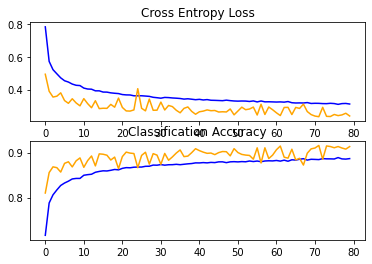

In [ ]:
summarize_diagnostics(history)

**Predictions**

1

In [ ]:
from keras.preprocessing import image
img=x_test[2]
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)
result=cnn.predict(img)
result=result.reshape(-1)
max=result[0]
pred=0
for i in range(0, len(result)):
    if(result[i]>max):
        pred=i
        max=result[i]
print(pred)

1


(28, 28)


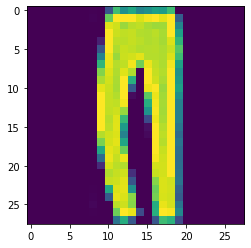

In [ ]:
img1=x_test[2]
img1=img1.reshape(28, 28)
print(img1.shape)
plt.imshow(img1)

2

In [ ]:
from keras.preprocessing import image
img=x_test[2100]
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)
result=cnn.predict(img)
result=result.reshape(-1)
max=result[0]
pred=0
for i in range(0, len(result)):
    if(result[i]>max):
        pred=i
        max=result[i]
print(pred)

7


(28, 28)


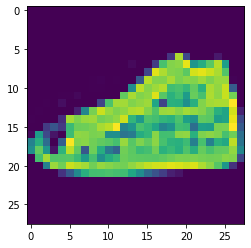

In [ ]:
img1=x_test[2100]
img1=img1.reshape(28, 28)
print(img1.shape)
plt.imshow(img1)